In [ ]:
# 데이터 불러오기
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
# Classification Tree
from sklearn import tree  # 또는 from sklearn import DecisionTreeClassifier
import seaborn as sns # seaborn을 불러오고 SNS로 축약
iris = sns.load_dataset('iris')  # iris라는 변수명으로 Iris data를 download

X = iris.drop('species', axis=1) # 'species'열을 drop하고 input X를 정의
y = iris['species']

In [ ]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [ ]:
# y data를 범주형으로 변환
# LabelEncoder() method를 불러옴
classle = LabelEncoder()
y = classle.fit_transform(iris['species'].values) # species 열의 문자열을 categorical 값으로 전환

In [ ]:
# 전체 data를 training set과 test set으로 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1, stratify=y)

In [ ]:
# 표준화

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
for i in range(2,11,3):
  print('Gini criterion with max_depth',i,':')
  dtc = tree.DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=1)
  dtc.fit(X_train, y_train)
  y_train_pred = dtc.predict(X_train)  
  y_test_pred = dtc.predict(X_test)    
  print(np.around(metrics.accuracy_score(y_train, y_train_pred) ,3))  # Training accuracy
  print(np.around(metrics.accuracy_score(y_test, y_test_pred),3)) # Test accuracy
  print(np.around(metrics.confusion_matrix(y_test, y_test_pred),3))
  print(np.around(dtc.feature_importances_,2))

Gini criterion with max_depth 2 :
0.952
0.956
[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
[0.   0.   0.43 0.57]
Gini criterion with max_depth 5 :
0.99
0.978
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
[0.02 0.   0.41 0.57]
Gini criterion with max_depth 8 :
1.0
0.978
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
[0.04 0.   0.4  0.56]


In [ ]:
for i in range(2,11,3):
  print('Entropy criterion with max_depth',i,':')
  dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=1)
  dtc.fit(X_train, y_train)
  y_train_pred = dtc.predict(X_train)  
  y_test_pred = dtc.predict(X_test)    
  print(np.around(metrics.accuracy_score(y_train, y_train_pred) ,3))  # Training accuracy
  print(np.around(metrics.accuracy_score(y_test, y_test_pred),3)) # Test accuracy
  print(np.around(metrics.confusion_matrix(y_test, y_test_pred),3))
  print(np.around(dtc.feature_importances_,2))

Entropy criterion with max_depth 2 :
0.952
0.956
[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
[0.   0.   0.33 0.67]
Entropy criterion with max_depth 5 :
0.971
0.978
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
[0.01 0.   0.35 0.63]
Entropy criterion with max_depth 8 :
0.99
0.978
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
[0.01 0.02 0.34 0.62]


In [ ]:
?tree.DecisionTreeClassifier

In [ ]:
dtc_2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
dtc_2.fit(X_train, y_train)

dtc_8 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)
dtc_8.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

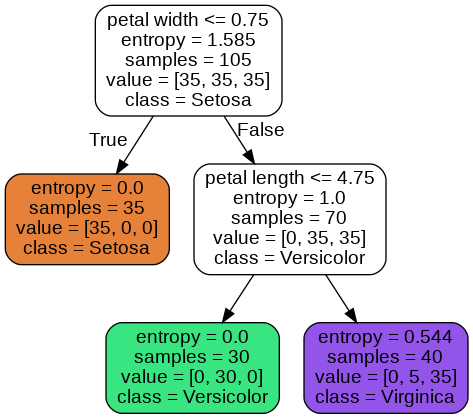

In [ ]:
from pydotplus import graph_from_dot_data  # "pydotplus"는 따로 설치해야 함.
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtc_2, filled=True, rounded=True,
                           class_names=['Setosa', 'Versicolor', 'Virginica'], 
                           feature_names=['sepal length', 'sepal width',
                                          'petal length', 'petal width'],
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_2.png')  # 현재경로(import os 엔터 os.getcwd()로 확인)에 저 장


from IPython.display import Image 
Image(graph.create_png())   # Console 창에 결과 그림 출력